## EE 242 Lab 3a – Convolution - Convolving Signals

**Ben Eisenhart, Yehoshua Luna, Aaron McBride** 

This short lab only has one exercise to be completed as a team. The exercise should be in its own code cell followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [80]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included
from matplotlib.ticker import MultipleLocator

## Summary

In labs 3A and 3B, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of convolution and smoothing on the sound of the signals.  Lab 3A should be done in section.

## Lab 3a turn in checklist

•	Lab 3a Jupyter notebook with code for the first assignment. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF or html** 

## Assignment 1 -- Convolving Simple Signals

We will start by doing some simple convolutions similar to what you saw in class. There is a skeleton for Assignment 1 below, but you can create more cells as needed. This assignment will have three parts, A-C.

**A.** Create the following three discrete-time signals, assuming a time range of [0,12].  
x = a box of height 1 starting at time t=2 and ending at t=8  
h1 = a pulse of length 4 & height 1 starting at time t=0  
h2 = 1 at first sample, -1 at at second sample, and 0 otherwise  

**B.**  Use numpy.convolve() function to find y1=$x*h1$ and y2=$x*h2$ (where $*$ indicates convolution, not multiplication) (See https://numpy.org/doc/stable/reference/generated/numpy.convolve.html). Notice the length of the output.

**C.**  Create a time vectors nx, ny1 and ny2 for plotting x, y1 and y2. Use the stem plotting function to plot the signals on a 3x1 subplot, using a y-axis between -2 and 5 and a time axis from 0 to 20. Label and title the graphs. Verify that the signals for (y1) and (y2) match what you would expect.

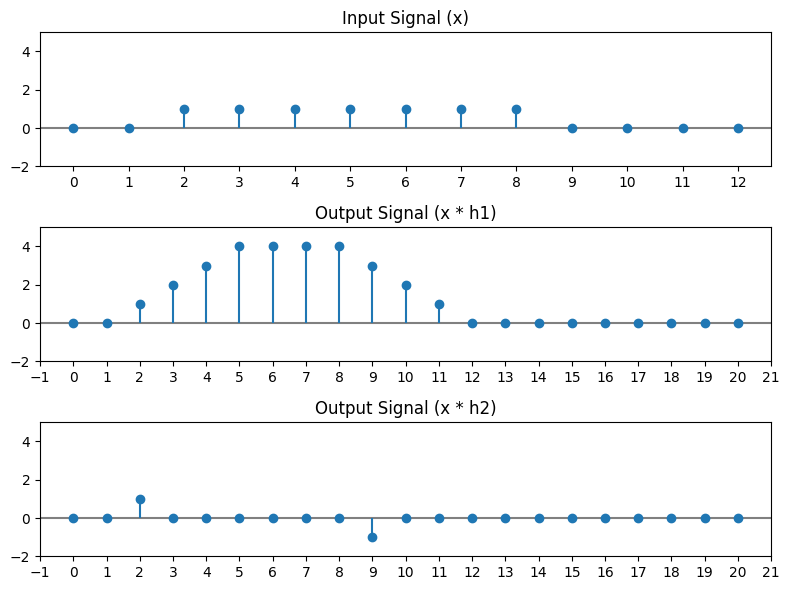

In [81]:
#################################################################################
# PART A - Signal Creation
#################################################################################

# Create the x signal array
x = np.zeros(13)
x[2:9] = 1
nx = np.arange(0, 13)

# Create the h1 signal array
h1 = np.zeros(13)
h1[0:4] = 1

# Create the H2 signal array
h2 = np.zeros(13)
h2[0] = 1
h2[1] = -1

#################################################################################
# PART B - Convolution
#################################################################################

# Create y1 by convolving x and h1
y1 = np.convolve(x, h1)[:21]
ny1 = np.arange(21)

# Create y2 by convolving x and h2
y2 = np.convolve(x, h2)[:21]
ny2 = np.arange(21)

#################################################################################
# PART C - Graphing
#################################################################################

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# TODO: Code that solves C
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# Plot data on each subplot
axs[0].stem(nx, x, basefmt = " ")
axs[0].set_title('Input Signal (x)')
axs[0].axhline(y=0, color='gray', zorder = 0)
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].set_ylim(-2, 5)  # Set y-limits for better visibility

axs[1].stem(ny1, y1, basefmt = " ")
axs[1].set_title('Output Signal (x * h1)')
axs[1].axhline(y=0, color='gray', zorder = 0)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].set_ylim(-2, 5)  # Set y-limits for better visibility

axs[2].stem(ny2, y2, basefmt = " ")
axs[2].set_title('Output Signal (x * h2)')
axs[2].axhline(y=0, color='gray', zorder = 0)
axs[2].xaxis.set_major_locator(MultipleLocator(1))
axs[2].set_ylim(-2, 5)  # Set y-limits for better visibility

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()

###  Discussion

The systems corresponding to impulse responses $h_1$[n] and $h_2$[n] capture different information about a signal. Comment on what aspects of the input signal correspond to the largest values of $y_1$[n] and $y_2$[n].
- When convolving the input signal x with the filter h1, the largest values in the output y1 occur in a region of length 4 at the midpoint of our box-shaped input signal. This is where x and h1 overlap the most, resulting in larger values because of how the convolution integral works. The filter h1 smoothes out the input signal x since it gradually increases and decreases at the edges. It would be very useful where you want to blur an image or smooth out an input. 
- When convolving the input signal x with h2 the largest values in the output y2 occur at the start and end of the region where the input signal is equal to 1 (note that the sign of the first largest value is positive and the sign of the second largest value is negative). This happens because the filter h1 is shaped so that it produces an output of zero when convolving across a linear region. The filter h1 finds the edges of a signal. It would be very useful for edge detection algorithms in computer vision applications. 